In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:\/Users\Acer\Desktop\ML\DATA\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.isna().sum()

#(there are no any null values)

YearsExperience    0
Salary             0
dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_2132\3578333612.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0.5, 1.0, 'Salary')

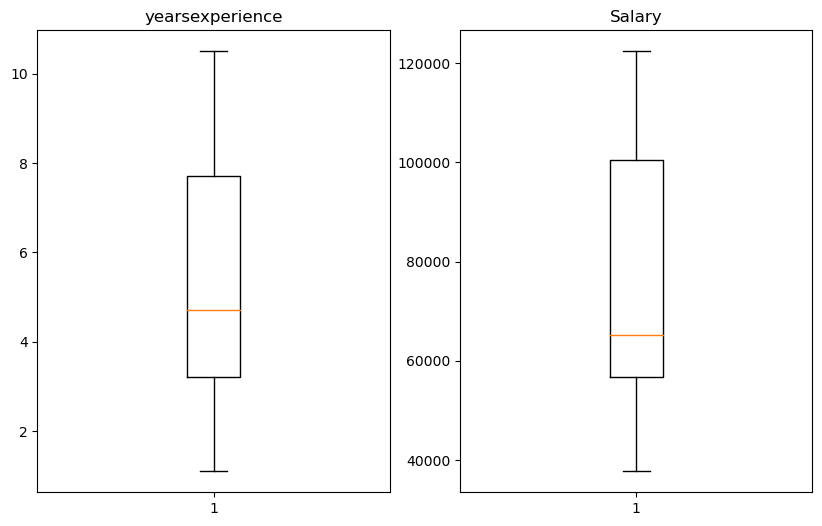

In [6]:
plt.subplots(figsize=(10,6))
plt.subplot(121)
plt.boxplot(df['YearsExperience'])
plt.title('yearsexperience')
plt.subplot(122)
plt.boxplot(df['Salary'])
plt.title('Salary')

#(here we can see there is no any outliers)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2132\3064995591.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Salary')

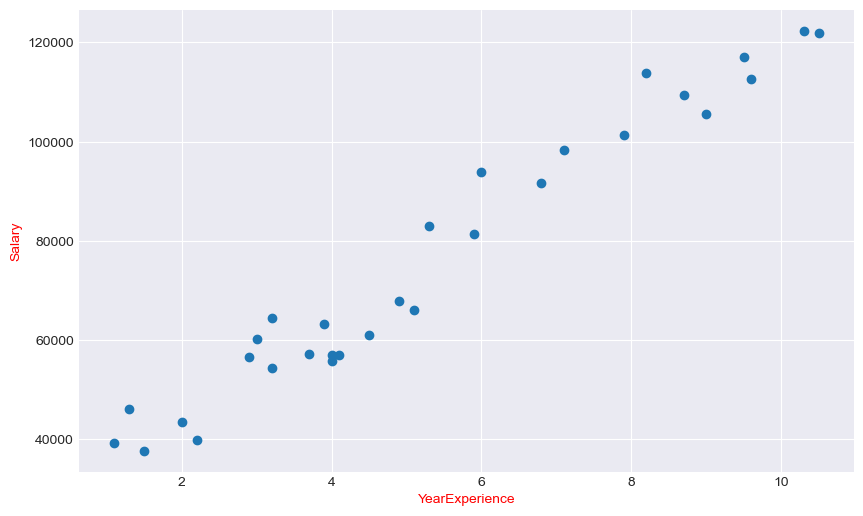

In [7]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearExperience',c='r')
plt.ylabel('Salary',c='r')

#(both the variables are +ve correlated)
#(looks like hohmosceadacity by visualisation)

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
# MODLING

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sfa

In [10]:
model1= sfa.ols('Salary~YearsExperience', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        09:35:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model2= sfa.ols('Salary~np.sqrt(YearsExperience)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           8.57e-18
Time:                        09:35:30   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model3= sfa.ols('Salary~np.log(YearsExperience)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.25e-13
Time:                        09:35:30   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model4= sfa.ols('Salary~np.cbrt(YearsExperience)',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.91e-16
Time:                        09:37:16   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
np.cbrt(YearsExperience)  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Acer\AppData\Local\Temp\ipykernel_2132\2355546220.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Salary')

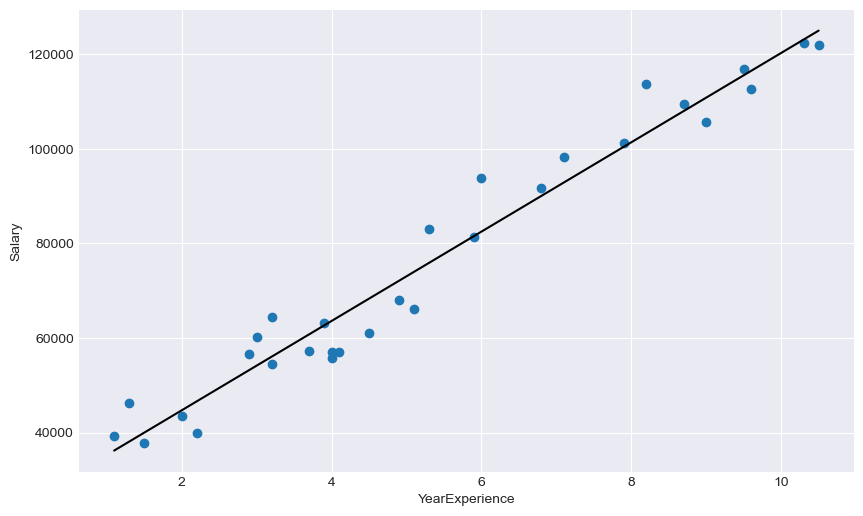

In [13]:
#(we can see the different r2_scores, so we can consider the highest one i.e model1)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(df['YearsExperience'],model1.predict(),c='black')
plt.xlabel('YearExperience')
plt.ylabel('Salary')

In [14]:
predicted= pd.DataFrame()
predicted['YearsExperience']= df['YearsExperience']
predicted['Salary']= df['Salary']
predicted['Predicted_Salary']= model1.predict()
predicted

#(these are the predicted salary and the actual salary according to the experience)

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [15]:
act= [df['Salary']]
pred= [predicted['Predicted_Salary']]
error= [x-y for x, y in zip(act,pred)]
error

[0      3155.841248
 1      8127.848783
 2     -2236.143681
 3     -1167.124842
 4     -6691.117306
 5      3444.909069
 6      6007.912837
 7     -1587.079627
 8      8412.920373
 9     -3568.060788
 10      570.946748
 11    -7798.049484
 12    -6635.049484
 13    -7456.045717
 14    -7206.030645
 15    -4159.015574
 16    -7958.008038
 17     7210.999498
 18     -183.977895
 19    11448.025873
 20     1686.056015
 21     5386.067319
 22      855.097462
 23    10530.108765
 24     1424.127605
 25    -5259.861092
 26     1402.157748
 27    -3876.838485
 28     -735.812110
 29    -3144.804574
 dtype: float64]

Text(0, 0.5, 'Error')

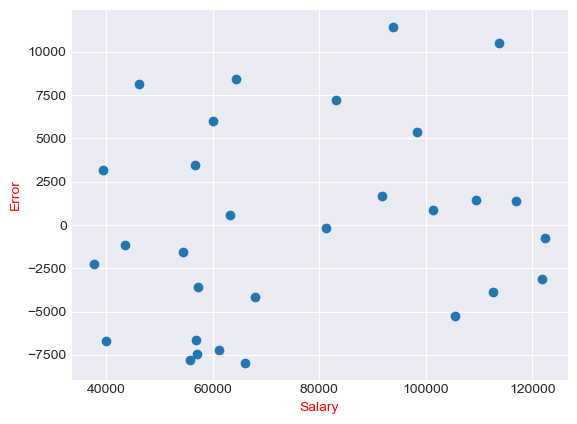

In [16]:
plt.scatter(df['Salary'],error)
plt.xlabel('Salary',c='r')
plt.ylabel('Error',c='r')

#(here we can see that there is no correlaltion between the error and the variable )